## Observations and Insights 

    From the generated figures, one observation that can be made is that the relationship between the average tumor volume and the weight of the mouse is linear. This is demonstrated by the correlation coefficient that was calculated in the Correlation and Regression section of the homework. The correlation coefficient measures the strength of the relationship between two variables and ranges from -1.0 to 1.0. A correlation coefficient value of -1.0 demonstrates a perfect negative correlation, while one of 1.0 demonstrates a perfect positive correlation. For the relationship between the average tumor volume and mouse weight, the correlation coefficient was found to be approximately 0.842. This value shows that the relationship between the average tumor volume and mouse weight is positively correlated; this means that the two variables tend to move in the same direction. This positive correlation between the average tumor volume and mouse weight is further demonstrated in the final plot of the homework. As the mouse weight increases, the average tumor volume also increases. Additionally, the line of regression that was generated points to the two variables as being positively correlated.
    
    Another observation is that the effectiveness of the Capomulin regimen cannot be outrightly be determined. For some mice, their tumor volume decreased as time passed. One example of this is Mouse x401. However, for other mice, their tumor volume increased as time passed while on the regimen. An example of this is Mouse i557. The variability in the effect of Capomulin on tumor volume demonstrates that this regimen cannot be stated as an effective treatment for squamous cell carcinoma.
    
    A final observation is the final tumor volumes for mice on the Ceftamin regimen is more spread out than those mice on Capomulin, Ramicane, or Infubinol regimens. The greater spread in the final tumor volums for mice on the Ceftamin regimen is seen in the box-and-whisker plot generated in the homework. The spread of the final tumor volumes can be seen in the length of the rectangular box in a box-and-whisker plot. The longer the box is, the more greatly spread out the data is. This demonstrates that the Ceftamin final tumor volumes vary greatly. 

    


In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = len(combined_df["Mouse ID"].unique())
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(["Mouse ID"])]
duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset = "Mouse ID", keep = "last")
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = cleaned_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = cleaned_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = cleaned_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_stddev = cleaned_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
# SEM = standard error of the mean
tumor_sem = cleaned_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean':tumor_mean, \
            'Median':tumor_median, \
            'Variance':tumor_var, \
            'Standard Deviation':tumor_stddev, \
            'SEM':tumor_sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

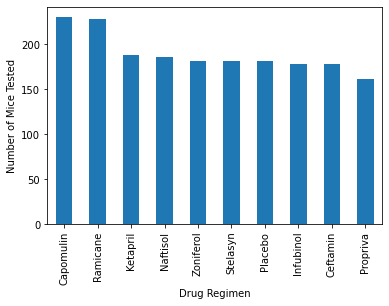

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar = combined_df['Drug Regimen'].value_counts().plot.bar()

bar.set_xlabel('Drug Regimen')
bar.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

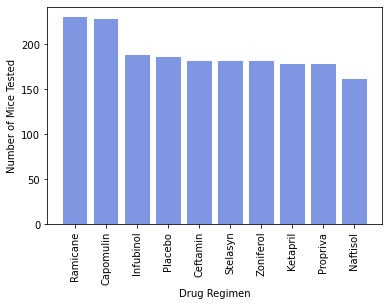

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = combined_df['Drug Regimen'].unique()
yaxis = combined_df['Drug Regimen'].value_counts()
plt.bar(xaxis, yaxis , color = '#002fc9', alpha = 0.5, align = 'center')
# I could not figure out the correct color for the bar graph using pyplot
# Will probably require more trial-and-error because the hex color code generated here: https://g.co/kgs/EX73dZ
# does not match when inputted into plt.bar above
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

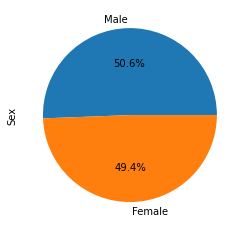

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Used to check if numbers on pie plots were correct:
# genders = combined_df['Sex'].sort_values().value_counts()
pie = combined_df['Sex'].value_counts().plot.pie(autopct = '%1.1f%%')

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

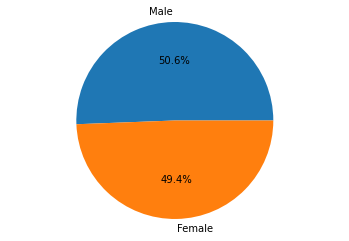

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = combined_df['Sex'].value_counts()
labels = combined_df['Sex'].unique()
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_tp = combined_df.groupby('Mouse ID').max()['Timepoint']
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(last_tp_df, combined_df, on = ('Mouse ID')).rename(\
                    columns = {'Timepoint_x':'Timepoint','Timepoint_y': 'Max Timepoint'})


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == regimen]
    
    # add subset  
    final_tumor_vol = tumor_vol.loc[tumor_vol['Timepoint'] == tumor_vol['Max Timepoint']]
    final_volumes = final_tumor_vol['Tumor Volume (mm3)']
    tumor_vol_list.append(final_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    # Calculating the upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = (final_volumes.loc[(final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) \
                          | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]).count()

Text(0, 0.5, 'Final Tumor Volume (mm3)')

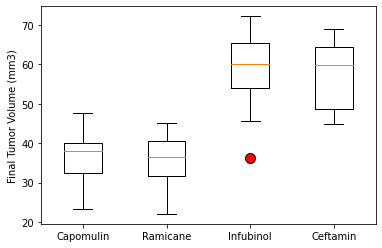

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box = plt.boxplot(tumor_vol_list, labels = regimen_list, flierprops = {'markersize': 10, 'markerfacecolor': 'red'})
# To change properties of the outliers: 
# https://stackoverflow.com/questions/65648502/how-to-change-outlier-point-symbol-in-python-matplotlib-pyplot
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

The first mouse listed given the Capomulin regimen is s185
['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


Text(0.5, 1.0, 'Capomulin Treament of Mouse s185')

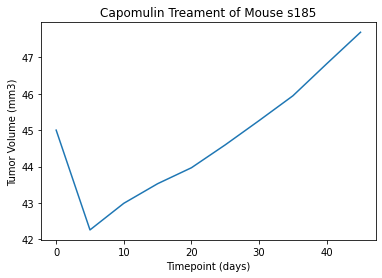

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# I found the first mouse that was listed as being on the Capomulin regimen
combined_df_id = combined_df.set_index('Mouse ID')
cap_mouse = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
print(f'The first mouse listed given the Capomulin regimen is {cap_mouse[0]}')
print(cap_mouse)

# The first mouse listed is mouse s185.
# A graph similar to the given example line plot of Mouse l509 can be generated here.
# To see that result, manually input l509 into below line.
# Could possibly provide user a list of mice on Capomulin regimen and then ask 
# the user to input which mouse they want to look at.
mouse = combined_df.loc[combined_df['Mouse ID'] == 'i557']

x = mouse['Timepoint']
y = mouse['Tumor Volume (mm3)']
plt.plot(x,y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treament of Mouse s185')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

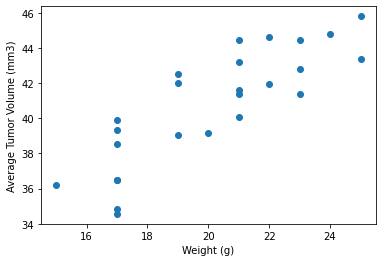

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = pd.DataFrame(capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
combined_capomulin_df = pd.merge(avg_tumor_vol, capomulin_mice, on = 'Mouse ID').drop_duplicates(subset = 'Mouse ID').\
                                rename(columns = {'Tumor Volume (mm3)_x':'Average Tumor Volume (mm3)'})

capomulin_mice_weight = []
for x in capomulin_mice:
    capomulin_weight = cleaned_df.loc[cleaned_df['Mouse ID'] == x]['Weight (g)']
    capomulin_mice_weight.append(capomulin_weight)

x = combined_capomulin_df['Weight (g)']
y = combined_capomulin_df['Average Tumor Volume (mm3)']
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.8419363424694717.


Text(0, 0.5, 'Average Tumor Volume (mm3)')

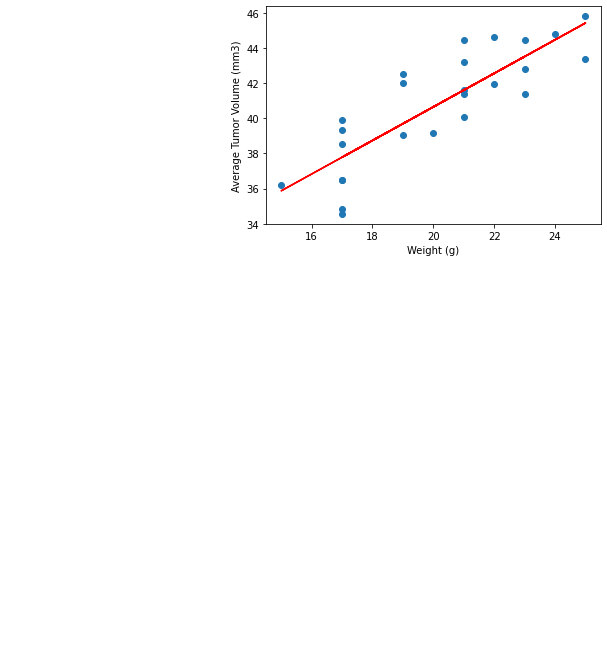

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculating the correlation coefficient
# Correlation coefficient = statistical measure of the strength of the relationship between the relative
                        # movements of two variables
                        # https://www.investopedia.com/terms/c/correlationcoefficient.asp
correlation = st.pearsonr(x,y)
print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {correlation[0]}.')

# Adding the linear regression line to the previous scatter plot
# x and y variables were previously defined with x being the Weight (g) and y being the Average Tumor Volume (mm3)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (6, 10), fontsize = 15, color = 'red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')